c:\Users\galla\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


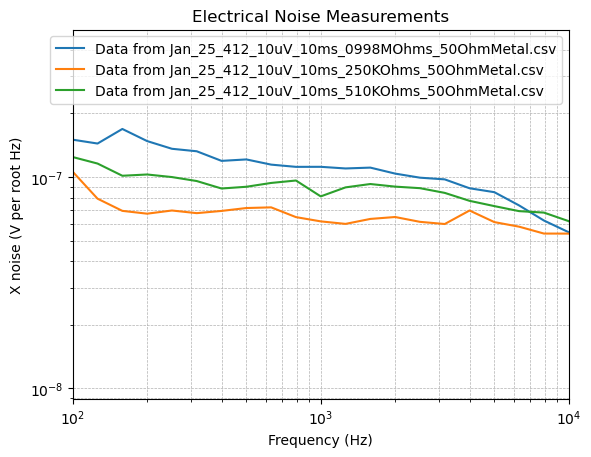

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the folder path where the data files are located
folder_path = r"Jan_25_Resistor_Sweep"

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]
termiator_noise_file = "Jan_25_412_10uV_10ms_0Ohms_50OhmMetal.csv" 

file_path = os.path.join(folder_path, termiator_noise_file)
df = pd.read_csv(file_path)
terminator_noise_data = df['X noise (V per root Hz) - Plot 0']

avg_values = []

# Loop through each CSV file and plot the data
for file in csv_files:

    if (file != termiator_noise_file):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)

        x_values = df['Frequency (Hz) - Plot 0']
        y_values = df['X noise (V per root Hz) - Plot 0']

        y_values = np.sqrt(y_values**2 - terminator_noise_data**2)

        avg_values.append(np.average(y_values[12:32]))

        plt.loglog(x_values, y_values, label=f'Data from {file}')


plt.xlabel('Frequency (Hz)')
plt.ylabel('X noise (V per root Hz)')
plt.title('Electrical Noise Measurements')

plt.legend()

# Set log scale for grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xscale('log')
plt.yscale('log')

plt.xlim(100,10000)
plt.show()


In [13]:
avg_values


[1.0467267960494997e-07, 6.335569538065569e-08, 8.47082348103769e-08]

Text(0, 0.5, 'Noise V per root Hz)')

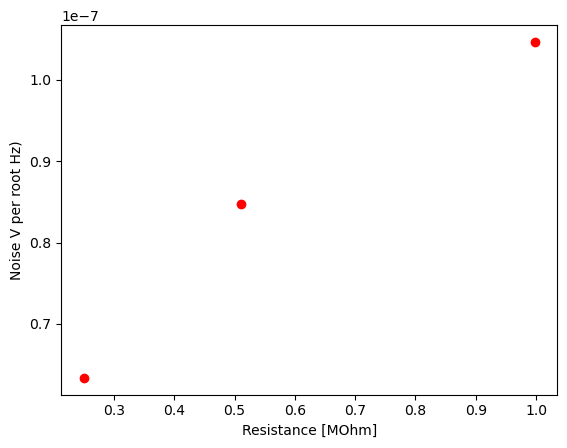

In [12]:
plt.plot([0.998,0.250,0.510],avg_values,'ro')
plt.xlabel("Resistance [MOhm]")
plt.ylabel("Noise V per root Hz)")